In [2]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris   # Example dataset (replace with yours)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Step 2: Load dataset
iris = load_iris()
X = iris.data
y = iris.target


In [6]:
# Step 3: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
# Step 4: Feature Scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Step 5: Train KNN model for different K values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Step 6: Choose best K
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"Best K = {best_k}, Accuracy = {best_acc:.4f}")

Best K = 1, Accuracy = 0.9667


In [12]:
# Retrain model with best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

In [14]:
# Step 7: Evaluate with confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



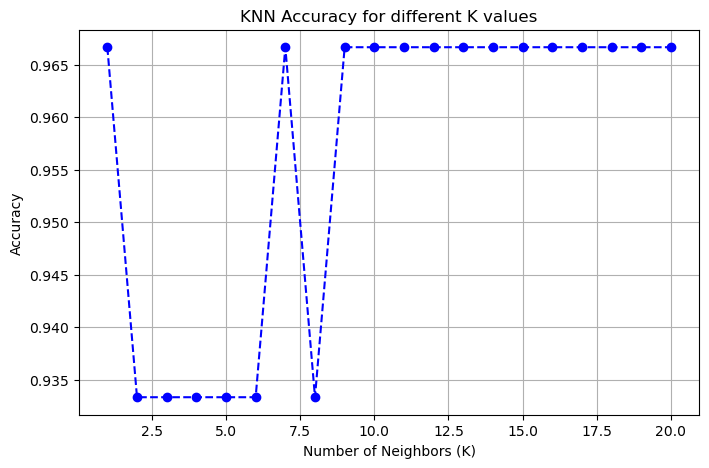

In [16]:
# Step 8: Visualization of Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for different K values")
plt.grid(True)
plt.show()
